In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('e-food restaurants - reviews - thessaly.csv')

In [12]:
df

,Description,GroundTruth,Ratings,ReviewDate,ReviewTitle,Site
0,I visit this place with my friends. It was ver...,positive,5,1-Mar-20,The Best Italian Food in Larissa,NaN
1,It deserves every star given in Trip Advisor. ...,positive,5,9-Jan-20,Excellent,NaN
2,Great good and value for money. A must visit i...,positive,5,20-Dec-19,Great good!,NaN
3,We went with friends. We took seats in the gar...,positive,5,7-Jun-19,"Delicious food, excellent service",NaN
4,Beautiful and cosy place ! Delicious and big p...,positive,5,6-Mar-19,Excellent !,NaN
...,...,...,...,...,...,...
1035,"Staff was very polite, the music and the ambie...",positive,4,11-Mar-18,Pleasant dinner in Trikala,Trip Advisor
1036,"Nice place very good food, fast service good p...",positive,5,28-Jan-18,Nice lamp,Trip Advisor
1037,We were about 20 people and they didn't have a...,positive,4,27-Jan-18,"Good place, sometimes can be noisy",Trip Advisor
1038,Everything said in the title :)\nWe came to Tr...,positive,5,24-Jan-18,Superb home-style local food in HUGE portions,Trip Advisor


In [13]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [14]:
# Product Scores
fig = px.histogram(df, x="Ratings")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Restaurant Score')
fig.show()

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
stop_words.update(["br", "href"])

In [19]:
textt = " ".join(review for review in df.Description)

In [20]:
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

In [21]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Description)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

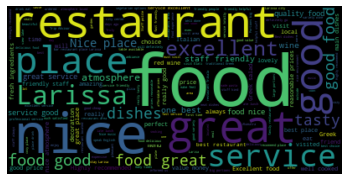

In [22]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud101.png')
plt.show()

***Classitying Tweets***

Classifying reviews into “positive” and “negative,” so we can use this as training data for our sentiment classification model. Positive reviews will be classified as +1, and negative reviews will be classified as -1. We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive. All reviews with ‘Score’ < 3 will be classified as -1. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negative reviews.

In [23]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3

df = df[df['Ratings'] != 3]
df['sentiment'] = df['Ratings'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df

,Description,GroundTruth,Ratings,ReviewDate,ReviewTitle,Site,sentiment
0,I visit this place with my friends. It was ver...,positive,5,1-Mar-20,The Best Italian Food in Larissa,NaN,1
1,It deserves every star given in Trip Advisor. ...,positive,5,9-Jan-20,Excellent,NaN,1
2,Great good and value for money. A must visit i...,positive,5,20-Dec-19,Great good!,NaN,1
3,We went with friends. We took seats in the gar...,positive,5,7-Jun-19,"Delicious food, excellent service",NaN,1
4,Beautiful and cosy place ! Delicious and big p...,positive,5,6-Mar-19,Excellent !,NaN,1
...,...,...,...,...,...,...,...
1035,"Staff was very polite, the music and the ambie...",positive,4,11-Mar-18,Pleasant dinner in Trikala,Trip Advisor,1
1036,"Nice place very good food, fast service good p...",positive,5,28-Jan-18,Nice lamp,Trip Advisor,1
1037,We were about 20 people and they didn't have a...,positive,4,27-Jan-18,"Good place, sometimes can be noisy",Trip Advisor,1
1038,Everything said in the title :)\nWe came to Tr...,positive,5,24-Jan-18,Superb home-style local food in HUGE portions,Trip Advisor,1


In [25]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]
# negative = df[df['sentiment'] < 1]

Wordcloud for positive sentiment

In [26]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"])

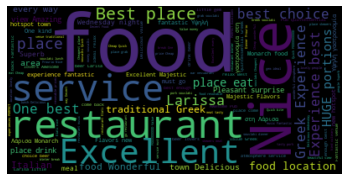

In [27]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.ReviewTitle)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

Wordcloud for the negative sentiments

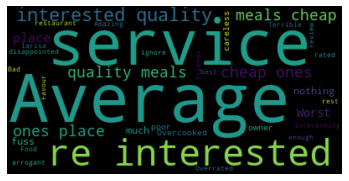

In [28]:
neg = " ".join(review for review in negative.ReviewTitle)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

***Building the Model:***

This model will take reviews in as input. It will then come up with a prediction on whether the review is positive or negative. This is a classification task, so we will train a simple logistic regression model to do it.

Cleaning Data

In [29]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Description'] = df['Description'].apply(remove_punctuation)
df = df.dropna(subset=['ReviewTitle'])
df['ReviewTitle'] = df['ReviewTitle'].apply(remove_punctuation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Split the dataframe

In [30]:
dfNew = df[['ReviewTitle','sentiment']]
dfNew

,ReviewTitle,sentiment
0,The Best Italian Food in Larissa,1
1,Excellent,1
2,Great good,1
3,"Delicious food, excellent service",1
4,Excellent,1
...,...,...
1035,Pleasant dinner in Trikala,1
1036,Nice lamp,1
1037,"Good place, sometimes can be noisy",1
1038,Superb home-style local food in HUGE portions,1


We will now split the data frame into train and test sets. 80% of the data will be used for training, and 20% will be used for testing.

In [31]:
# random split train and test data
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

Create a bag of words

Now we will use a count vectorizer from the Scikit-learn library. This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed. We will need to convert the text into a bag-of-words model since the logistic regression algorithm cannot understand text.

In [32]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['ReviewTitle'])
test_matrix = vectorizer.transform(test['ReviewTitle'])

In [33]:
df['sentiment'].value_counts()

 1    950
-1     31
Name: sentiment, dtype: int64

We observe that the negative reviews are fewer than the positive ones. This means that the dataset is imbalanced. There are many different imbalanced data handling techniques. We will implement SMOTE.

# Machine Learning Algorithms

***Logistic Regression:***<BR>
It is a very basic yet important classification algorithm in machine learning that uses one or more independent variables to determine an outcome. Logistic regression tries to find a best-fitting relationship between the dependent variable and a set of independent variables.


Pros:

-It is a very simple and efficient algorithm.<BR>
-Low variance.<BR>
-Provides probability score for observations.<BR>
Cons:

-Bad at handling a large number of categorical features.<BR>
-It assumes that the data is free of missing values and predictors are independent of each other.

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr = LogisticRegression()

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

lr.fit(X_train,y_train)
predictions = lr.predict(X_test)


# find accuracy, precision, recall:
print(confusion_matrix(predictions,y_test))
print(classification_report(y_test, predictions))


[[  2   0]
 [  4 197]]
              precision    recall  f1-score   support

          -1       1.00      0.33      0.50         6
           1       0.98      1.00      0.99       197

    accuracy                           0.98       203
   macro avg       0.99      0.67      0.74       203
weighted avg       0.98      0.98      0.98       203



In [35]:
# Logistic Regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

lr1 = LogisticRegression()

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']


sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

lr1.fit(X_train_res,y_train_res)
predictions = lr1.predict(X_test)


# find accuracy, precision, recall:
print(confusion_matrix(predictions,y_test))
print(classification_report(y_test, predictions))


[[  5   7]
 [  1 190]]
              precision    recall  f1-score   support

          -1       0.42      0.83      0.56         6
           1       0.99      0.96      0.98       197

    accuracy                           0.96       203
   macro avg       0.71      0.90      0.77       203
weighted avg       0.98      0.96      0.97       203



After SMOTE implementation we observe that the minority class has been increased to the total number of majority class. The accuracy decreased to 96% as compared to previous model but the recall value of minority class has also improved to 100%. This is a good model compared to the previous one. Recall is very good.

***Support Vector Machines:***<BR>SVM stands for Support Vector Machine. This is a supervised machine learning algorithm that is very often used for both classification and regression challenges. However, it is mostly used in classification problems.

Pros:

-SVM works relatively well when there is a clear margin of separation between classes.<BR>
-SVM is more effective in high-dimensional spaces.<BR>
Cons:

-SVM  is not suitable for large data sets.<BR>
-SVM does not perform very well when the data set has more noise i.e. when target classes are overlapping. So, it needs to be handled.

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm = SVC(kernel = 'linear')
svm.fit(X_train_res,y_train_res)
y_pred = svm.predict(X_test)

# find accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.42      0.83      0.56         6
           1       0.99      0.96      0.98       197

    accuracy                           0.96       203
   macro avg       0.71      0.90      0.77       203
weighted avg       0.98      0.96      0.97       203



***Naive Bayes:***<BR>
Naive Bayes is based on Bayes’s theorem which gives an assumption of independence among predictors. This classifier assumes that the presence of a particular feature in a class is not related to the presence of any other
feature/variable.<BR>

Naive Bayes Classifier are of three types: Multinomial Naive Bayes, Bernoulli Naive Bayes, Gaussian Naive Bayes.<BR>

Pros:

-This algorithm works very fast.<BR>
-It can also be used to solve multi-class prediction problems as it’s quite useful with them.<BR>
-This classifier performs better than other models with less training data if the assumption of independence of features holds.<BR>
Cons:

-It assumes that all the features are independent.

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_res.todense(),y_train_res)
y_pred2 = nb.predict(X_test.todense())  

# find accuracy
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          -1       0.38      0.83      0.53         6
           1       0.99      0.96      0.98       197

    accuracy                           0.96       203
   macro avg       0.69      0.90      0.75       203
weighted avg       0.98      0.96      0.96       203



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



***K-Nearest Neighbor Algorithm:***<br>
K-Nearest Neighbor Algorithm classifies the new data points depending upon the class of the majority of data points amongst the K neighbor, where K is the number of neighbors to be considered. KNN captures the idea of similarity (sometimes called distance,
proximity, or closeness) with some basic mathematical distance formulas like euclidean distance, Manhattan distance, etc.<br>

Pros:

-KNN is simple and easiest to implement.<br>
-There’s no need to build a model, tuning several parameters, or make additional assumptions like some of the other classification algorithms.<br>
-It can be used for classification, regression, and search. So, it is flexible.<br>
Cons:

-The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,y_train_res)
y_pred3 = knn.predict(X_test)

# find accuracy
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

          -1       0.40      1.00      0.57         6
           1       1.00      0.95      0.98       197

    accuracy                           0.96       203
   macro avg       0.70      0.98      0.77       203
weighted avg       0.98      0.96      0.96       203



***Decision Tree:***<br>
The decision tree is one of the most popular machine learning algorithms used. They are used for both classification and regression problems. Decision trees mimic human-level thinking so it’s so simple to understand the data and make some good intuitions and interpretations. They actually make you see the logic for the data to interpret. Decision trees are not like black-box algorithms like SVM, Neural Networks, etc.<br>

Pros:

-When compared to other algorithms, decision trees require less effort for data preparation while pre-processing.<br>
-They do not require normalization of data and scaling as well.<br>
-Model made on decision tree is very intuitive and easy to explain to technical teams as well as to stakeholders also.<br>
Cons:

-If even a small change is done in the data, that can lead to a large change in the structure of the decision tree causing instability.<br>
-Sometimes calculation can go far more complex compared to other algorithms.<br>
Decision trees often take higher time to train the model.

In [39]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train_res,y_train_res)
y_pred4 = dt.predict(X_test)

# find accuracy
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

          -1       0.38      0.83      0.53         6
           1       0.99      0.96      0.98       197

    accuracy                           0.96       203
   macro avg       0.69      0.90      0.75       203
weighted avg       0.98      0.96      0.96       203



***Random Forest Classifiers:***<br>
A random forest classifier is a meta-estimator that fits a number of decision trees on different sub-samples of datasets and utilizes average to enhance prediction accuracy while controlling over-fitting.<br>
The original input sample size is always used as the sub-sample size, but the samples are generated using replacement. In most situations, reducing over-fitting and using a random forest classifier outperforms decision trees. However, real-time prediction is slow, difficult to execute, and the method is complicated.

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train_res,y_train_res)
y_pred5 = rfc.predict(X_test)

# find accuracy
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

          -1       1.00      0.33      0.50         6
           1       0.98      1.00      0.99       197

    accuracy                           0.98       203
   macro avg       0.99      0.67      0.74       203
weighted avg       0.98      0.98      0.98       203



***XGBoost:***<br>

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_res,y_train_res)
clf.score(X_test, y_test)

0.9605911330049262

***Ridge Regression:***<br>
Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

In [42]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier().fit(X_train_res,y_train_res)
rc.score(X_test, y_test)

0.9507389162561576

***Multi-layer Perceptron Classifier(MLPClassifier):***<br>
The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. Between the input and the output layer there may be one or more nonlinear hidden layers.

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlpc = MLPClassifier(random_state=1, max_iter=300).fit(X_train_res,y_train_res)
mlpc.predict_proba(X_test)
y_predmlpc = mlpc.predict(X_test)

mlpc.score(X_test, y_test)
print(classification_report(y_test, y_predmlpc))
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predmlpc)))

              precision    recall  f1-score   support

          -1       0.45      0.83      0.59         6
           1       0.99      0.97      0.98       197

    accuracy                           0.97       203
   macro avg       0.72      0.90      0.79       203
weighted avg       0.98      0.97      0.97       203

Accuracy: 0.97


# Model Comparison

(0.9, 1.0)

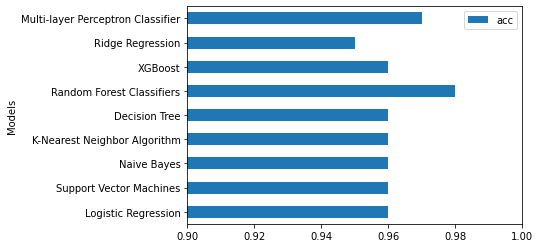

In [49]:
df = pd.DataFrame({'Models': ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 
                              'K-Nearest Neighbor Algorithm', 'Decision Tree', 'Random Forest Classifiers',
                              'XGBoost', 'Ridge Regression', 'Multi-layer Perceptron Classifier'],
                    'acc': [0.96, 0.96, 0.96, 0.96, 0.96, 0.98, 0.96, 0.95, 0.97]})
ax = df.plot.barh(x='Models', y='acc')
ax.set_xlim(0.9, 1)

Generally, we observe that all models fit the data optimally by having accuracy greater than 90%. Nevertheless, the best one is the Random Forest Classifiers followed by Multi-layer Perceptron Classifier with accuracy 0.98 and 0.97 respectively.